load csv file and extract only questions for analysis and applying ML alogos

In [3]:
import pandas as pd

# Load the dataset
input_file ="questions_answers.csv"
output_file = "questions_only.csv"  # Name of the output file

# Read the CSV file
df = pd.read_csv(input_file)

# Check if a "questions" column exists
if 'question' in df.columns:
    # Extract the "questions" column
    questions_df = df[['question']]
    
    # Save the extracted questions to a new CSV file
    questions_df.to_csv(output_file, index=False)
    print(f"Questions extracted and saved to {output_file}")
else:
    print("The 'questions' column is not found in the dataset. Please check your file.") 
    


Questions extracted and saved to questions_only.csv


create keywords for labeling the questions

In [5]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('questions_only.csv')  

# Define categories and their keywords in lowercase (with additional keywords)
category_keywords = {
    'admission process': [
        'admission', 'fees', 'criteria', 'application', 'jee', 'seats', 'admit', 
        'eligibility', 'quota', 'reservation', 'process', 'documents', 'entrance'
    ],
    'academics': [
        'curriculum', 'course', 'courses', 'faculty', 'subject', 'syllabus', 'semester', 
        'education', 'assignments', 'research', 'projects', 'learning', 'focus', 'degree', 
        'study', 'load', 'workload', 'exams', 'marking scheme', 'teacher', 'professor', 
        'ratio', 'artificial intelligence', 'robotics', 'machine learning',"communication skills",'english','faculties?','data science?'
    ],
    'facilities': [
        'hostel', 'library', 'food', 'sports', 'mess', 'facility', 'class', 
        'medical', 'wifi', 'transport', 'hygiene', 'labs', 'campus', 'doctor', 'health', 
        'sick'
    ],
    'placements and internships': [
        'placement', 'internship', 'job', 'package', 'recruiters', 'companies', 
        'salary', 'training', 'career', 'employment', 'interview', 'opportunities'
    ],
    'university details': [
        'university', 'founder', 'location', 'history', 'departments', 'campus', 
        'website', 'how many', 'cost', 'dean', 'director', 'chancellor', 
        'mission', 'vision', 'gender ratio', 'students', 'staff', 'batch', 
        'started', 'student-teacher ratio', 'unique', 'initiative', 'focus', 
        'bhopal', 'move','best','sitare'
    ],
    'student life and clubs': [
        'club', 'extracurricular', 'student life', 'sports', 'fest', 
        'activities', 'events', 'culture', 'hobbies', 'celebrations', 'participation'
    ],
    'scholarship': [
        'scholarship', 'aid', 'financial help', 'funding', 'loan', 'fee waiver', 
        'merit', 'need-based', 'income', 'support'
    ],
    'policies and rules': [
        'policy', 'policies', 'rules', 'regulations', 'restrictions', 
        'scam', 'norms', 'conduct', 'compliance', 'guidelines', 'code of conduct'
    ]
}



# Function to assign category based on keywords in the question
def assign_category(question):
    question = question.lower()  # Ensure question is in lowercase
    for category, keywords in category_keywords.items():
        if any(keyword in question for keyword in keywords):  # Compare using lowercase
            return category.lower()  # Ensure category is returned in lowercase
    return 'others'  # If no match, categorize as 'others'

# Apply the function to create a new 'Category' column
df['Category'] = df['question'].apply(assign_category)

# Convert the entire DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_questions_with_category_lowercase.csv', index=False)

print("Category column added and CSV saved successfully in lowercase.")



Category column added and CSV saved successfully in lowercase.


/tmp/ipykernel_174241/2124923889.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [6]:
df4=pd.read_csv("updated_questions_with_category_lowercase.csv")

In [7]:
df4

,question,Category
0,what is the fees,admission process
1,what is the cost of education,academics
2,what is the curriculum,academics
3,how are the faculty,academics
4,how many faculty are there,academics
...,...,...
296,where will students stay until the indore camp...,facilities
297,is sitare better than government colleges in t...,academics
298,will sitares curriculum support personal and p...,academics
299,why does sitare not explain the semester struc...,academics


In [8]:
df5 = df[df4['Category'] == 'others']


In [9]:
df5

,question,Category
20,do you have other branches apart from computer...,others
21,do you teach data science,others
44,whom can i contact if i have any further queries,others
57,who is the principal,others
64,what is the perspective about computer science,others
71,who are the visiting faculties,others
115,why i should join you,others
116,how can i excel in computer science i dont hav...,others
117,if i wanted to join you what expectations you ...,others
132,is there any rule if the student fails to perf...,others


In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Assuming you have a CSV file with 'question' and 'category' columns
dataset = pd.read_csv('updated_questions_with_category_lowercase.csv')

# Display the first few rows to understand the data
print("Dataset Preview:")
print(dataset.head())

# Check for missing values
print("\nMissing Values in Dataset:")
print(dataset.isnull().sum())


Dataset Preview:
                        question           Category
0               what is the fees  admission process
1  what is the cost of education          academics
2         what is the curriculum          academics
3            how are the faculty          academics
4     how many faculty are there          academics

Missing Values in Dataset:
question    0
Category    0
dtype: int64


vectoriese the questions and categories

In [16]:
# Convert text to lowercase
dataset['question'] = dataset['question'].str.lower()

# Split dataset into features (X) and target (y)
X = dataset['question']  # Features (questions)
y = dataset['Category']  # Target (categories)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Display the shape of the vectorized data
print("\nVectorized Training Data Shape:", X_train_vectorized.shape)
print("Vectorized Test Data Shape:", X_test_vectorized.shape)



Vectorized Training Data Shape: (175, 452)
Vectorized Test Data Shape: (75, 452)


In [23]:
df2=pd.read_csv("questions_with_categories.csv")

In [24]:
df2

,question,Category
0,what is the fees?,admission process
1,what is the cost of education?,academics
2,what is the curriculum?,academics
3,how are the faculty?,academics
4,how many faculty are there?,academics
...,...,...
245,is it better than nits and iiits,others
246,why sitare is best over private collages?,university details
247,how many clubs are there?,university details
248,which clubs are there?,student life and clubs


In [14]:
df2=pd.read_csv("updated_questions_with_category_lowercase.csv")

Applying naive bayes

In [34]:
import numpy as np
from collections import defaultdict
from math import log

# Assume 'df2' is already loaded with 'question' and 'Category'
X = df2['question']  # List of questions
y = df2['Category']  # List of categories

# Calculate class priors (P(C)) using value_counts()
class_counts = y.value_counts().to_dict()  # Counts of each class
total_samples = len(y)

# Prior probabilities for each class
priors = {category: count / total_samples for category, count in class_counts.items()}

# Tokenize function
def tokenize(text):
    return text.lower().split()

# Create a dictionary to hold word frequencies for each class
word_counts_by_class = defaultdict(lambda: defaultdict(int))
class_word_counts = defaultdict(int)

# Populate word counts by class
for text, label in zip(X, y):
    words = tokenize(text)
    for word in words:
        word_counts_by_class[label][word] += 1
        class_word_counts[label] += 1

# Calculate vocabulary size (V)
vocabulary = set(word for words in word_counts_by_class.values() for word in words.keys())
V = len(vocabulary)

# Calculate word probabilities P(x_i | C) with Laplace smoothing
word_probs = defaultdict(lambda: defaultdict(float))

for class_label, word_counts in word_counts_by_class.items():
    total_word_count = class_word_counts[class_label]
    for word, count in word_counts.items():
        word_probs[class_label][word] = (count + 1) / (total_word_count + V)  # Laplace smoothing

# Compute posterior probability for a given test question using logarithms
def compute_posterior(test_words):
    posteriors = {}
    
    for class_label in class_counts.keys():
        # Start with the log of the prior probability
        posterior = log(priors[class_label])
        
        # Multiply by the likelihoods of each word given the class
        for word in test_words:
            # Get the word probability for the class (small value if not found)
            word_prob = word_probs[class_label].get(word, 1 / (class_word_counts[class_label] + V))
            posterior += log(word_prob)  # Add log of word probability
        
        posteriors[class_label] = posterior
        
    return posteriors

# Function to predict class for a single test question
def predict(test_question):
    test_words = tokenize(test_question)
    posterior_probs = compute_posterior(test_words)
    predicted_class = max(posterior_probs, key=posterior_probs.get)
    return predicted_class

# Manually input test questions and their true categories
manual_test_questions = [
    ("What is the fee structure?", "academics"),
    ("Tell me about the hostel facilities", "facilities"),
    ("How do I apply for admission?", "admission"),
    ("What are the internship opportunities?", "placements and internships"),
    ("What is the syllabus for AI?", "academics"),
    ("What is the scholarship process?", "scholarship")
]

# Calculate accuracy for manually provided test questions
correct_predictions = 0
total_predictions = len(manual_test_questions)

for test_question, true_label in manual_test_questions:
    predicted_label = predict(test_question)
    print(f"Question: {test_question}")
    print(f"Predicted: {predicted_label}, True Label: {true_label}")
    if predicted_label == true_label:
        correct_predictions += 1

# Compute accuracy
accuracy = correct_predictions / total_predictions

print(f"\nAccuracy: {accuracy * 100:.2f}%")


Question: What is the fee structure?
Predicted: university details, True Label: academics
Question: Tell me about the hostel facilities
Predicted: facilities, True Label: facilities
Question: How do I apply for admission?
Predicted: academics, True Label: admission
Question: What are the internship opportunities?
Predicted: placements and internships, True Label: placements and internships
Question: What is the syllabus for AI?
Predicted: academics, True Label: academics
Question: What is the scholarship process?
Predicted: university details, True Label: scholarship

Accuracy: 50.00%


Applying logistic regresstion

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume 'df2' is already loaded with 'question' and 'Category'
X = df2['question']  # List of questions
y = df2['Category']  # List of categories

# Step 1: Text Preprocessing and Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # TF-IDF vectorization
X_tfidf = vectorizer.fit_transform(X)  # Transform questions to TF-IDF matrix

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Logistic regression model

# Train the model
model.fit(X_train, y_train)

# Step 4: Prediction
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")

# You can also manually test the model with specific questions
manual_test_questions = [
    "What is the fee structure?",
    "Tell me about the hostel facilities",
    "How do I apply for admission?",
    "What are the internship opportunities?",
    "What is the syllabus for AI?",
    "What is the scholarship process?"
]

# Transform the manual test questions using the same vectorizer
manual_test_tfidf = vectorizer.transform(manual_test_questions)

# Predict categories for the manual test questions
manual_predictions = model.predict(manual_test_tfidf)

# Print predictions for manual test questions
for question, predicted_label in zip(manual_test_questions, manual_predictions):
    print(f"Question: {question}")
    print(f"Predicted Category: {predicted_label}")


Accuracy: 68.00%
Question: What is the fee structure?
Predicted Category: academics
Question: Tell me about the hostel facilities
Predicted Category: facilities
Question: How do I apply for admission?
Predicted Category: admission process
Question: What are the internship opportunities?
Predicted Category: placements and internships
Question: What is the syllabus for AI?
Predicted Category: academics
Question: What is the scholarship process?
Predicted Category: university details


Applying clustering 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

X = df2['question']  # List of questions

# text Preprocessing and Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # TF-IDF vectorization
X_tfidf = vectorizer.fit_transform(X)  # Transform questions to TF-IDF matrix

# apply K-Means clustering
num_clusters = 5  # Number of clusters to form  , elobes says there will be 10 cluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Step 3: Get the cluster centers (terms most representative of each cluster)
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Print the top terms for each cluster
print("\nTop terms per cluster:")
for i in range(num_clusters):
    print(f"Cluster {i + 1}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))  # Top 10 terms

#  Predict clusters for each question
y_pred = kmeans.predict(X_tfidf)

#  Assign questions to clusters and display them
df2['Cluster'] = y_pred  # Adding  the predicted cluster to the dataframe

print("\nQuestions grouped by clusters:")
for i in range(num_clusters):
    print(f"\nCluster {i + 1}:")
    print(df2[df2['Cluster'] == i]['question'].tolist())

# Step 6: Manually test a question (for demonstration)
test_question = ["What is the fee structure?"]
test_tfidf = vectorizer.transform(test_question)
test_cluster = kmeans.predict(test_tfidf)

print(f"\nTest Question: {test_question[0]}")
print(f"Predicted Cluster: Cluster {test_cluster[0] + 1}")



Top terms per cluster:
Cluster 1:
students, internship, year, science, placement, computer, package, clubs, student, club
Cluster 2:
university, sitare, started, admission, degree, scholarship, choose, better, website, amit
Cluster 3:
indore, campus, shift, mess, hostel, provide, sitare, yes, following, final
Cluster 4:
campus, new, built, permanent, ready, long, sitare, doctor, like, located
Cluster 5:
faculty, python, abroad, subjects, qualifications, visiting, permanent, offline, sitare, specific

Questions grouped by clusters:

Cluster 1:
['what is the fees?', 'what is the cost of education?', 'what is the curriculum?', 'how many students are there?', 'when will you move to bhopal?', 'who is the founder?', 'do you have other branches apart from computer science?', 'do you teach data science?', 'do you teach machine learning?', 'do you teach artificial intelligence?', 'do you have hostel facilities?', 'are you following ugc norms?', 'how are your placements?', 'do you help in getti

check for elbos will form 

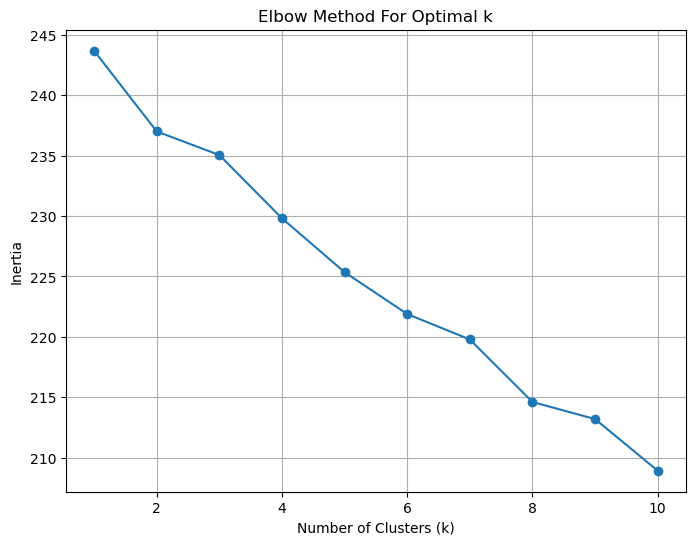

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume 'df2' contains the 'question' column
X = df2['question']  # List of questions

# Step 1: Text Preprocessing and TF-IDF Vectorization (Convert text to numerical data)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit to top 1000 features
X_tfidf = vectorizer.fit_transform(X)  # Transform questions into TF-IDF matrix

# Step 2: Test different numbers of clusters (k) and calculate inertia
inertia = []
for k in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)  # Fit the model
    inertia.append(kmeans.inertia_)  # Sum of squared distances to centroids

# Step 3: Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()
